# Best responses

---

## Definition of a best response

[Video](https://youtu.be/cJUZEmfhdcA?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

In a two player game $(A,B)\in{\mathbb{R}^{m\times n}}^2$ a mixed strategy $\sigma_r^*$  of the row player is a best response to a column players' strategy $\sigma_c$ iff:

$$
\sigma_r^*=\text{argmax}_{\sigma_r\in S_r}\sigma_rA\sigma_c^T.
$$

Similarly a mixed strategy $\sigma_c^*$  of the column player is a best response to a row players' strategy $\sigma_r$ iff:

$$
\sigma_c^*=\text{argmax}_{\sigma_c\in S_c}\sigma_rB\sigma_c^T.
$$

---

In other words: a best response strategy maximise the utility of a player given a known strategy of the other player.

## Best responses in the Prisoners Dilemma

Consider the Prisoners Dilemma:

$$
A = \begin{pmatrix}
3 & 0\\
5 & 1
\end{pmatrix}\qquad
B = \begin{pmatrix}
3 & 5\\
0 & 1
\end{pmatrix}
$$

We can easily identify the pure strategy best responses by underlying the corresponding utilities. For the row player, we will underline the best utility in each column:

$$
A = \begin{pmatrix}
3 & 0\\
\underline{5} & \underline{1}
\end{pmatrix}
$$

For the column player we underling the best utility in each row:

$$
B = \begin{pmatrix}
3 & \underline{5}\\
0 & \underline{1}
\end{pmatrix}
$$

We see that both players' best responses are their second strategy.

## Best responses in matching pennies

[Video](https://youtu.be/dLUWbKNxU44?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

Consider matching pennies with the best responses underlined:

$$
A = \begin{pmatrix}
\underline{1} & -1\\
-1 & \underline{1}
\end{pmatrix}\qquad
B = \begin{pmatrix}
-1 & \underline{1}\\
\underline{1} & -1
\end{pmatrix}
$$

We see that the best response now depend on what the opponent does.

Let us consider the best responses against a mixed strategy (and apply the previous definition):

- Assume $\sigma_r=(x,1-x)$
- Assume $\sigma_c=(y,1-y)$

We have:

$$
A\sigma_c^T = \begin{pmatrix}
2y-1\\
1-2y
\end{pmatrix}\qquad
\sigma_rB = \begin{pmatrix}
1-2x & 2x-1
\end{pmatrix}
$$

In [1]:
import sympy as sym
import numpy as np
sym.init_printing()

x, y = sym.symbols('x, y')
A = sym.Matrix([[1, -1], [-1, 1]])
B = - A
sigma_r = sym.Matrix([[x, 1-x]])
sigma_c = sym.Matrix([y, 1-y])
A * sigma_c, sigma_r * B

⎛⎡2⋅y - 1⎤                    ⎞
⎜⎢       ⎥, [1 - 2⋅x  2⋅x - 1]⎟
⎝⎣1 - 2⋅y⎦                    ⎠

Those two vectors gives us the utilities to the row/column player when they play either of their pure strategies:

- $(A\sigma_c^T)_i$ is the utility of the row player when playing strategy $i$ against $\sigma_c=(y, 1-y)$
- $(\sigma_rB)_j$ is the utility of the column player when playing strategy $j$ against $\sigma_r=(x, 1-x)$

Let us plot these (using `matplotlib`):

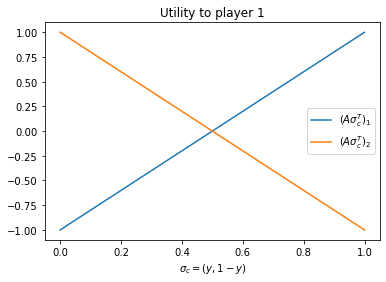

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc("savefig", dpi=100)  # Increase the quality of the images (not needed)

ys = [0, 1]
row_us = [[(A * sigma_c)[i].subs({y: val}) for val in ys] for i in range(2)]
plt.plot(ys, row_us[0], label="$(A\sigma_c^T)_1$")
plt.plot(ys, row_us[1], label="$(A\sigma_c^T)_2$")
plt.xlabel("$\sigma_c=(y, 1-y)$")
plt.title("Utility to player 1")
plt.legend()
plt.show()

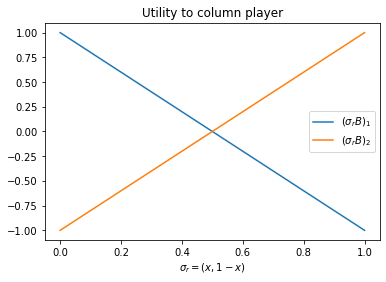

In [9]:
xs = [0, 1]
row_us = [[(sigma_r * B)[j].subs({x: val}) for val in xs] for j in range(2)]
plt.plot(ys, row_us[0], label="$(\sigma_rB)_1$")
plt.plot(ys, row_us[1], label="$(\sigma_rB)_2$")
plt.xlabel("$\sigma_r=(x, 1-x)$")
plt.title("Utility to column player")
plt.legend()
plt.show()

We see that the best responses to the mixed strategies are given as:

$$
\sigma_r^* = 
\begin{cases}
(1, 0),&\text{ if } y > 1/2\\
(0, 1),&\text{ if } y < 1/2\\
\text{indifferent},&\text{ if } y = 1/2
\end{cases}
\qquad
\sigma_c^* = 
\begin{cases}
(0, 1),&\text{ if } x > 1/2\\
(1, 0),&\text{ if } x < 1/2\\
\text{indifferent},&\text{ if } x = 1/2
\end{cases}
$$

In this particular case we see that for any given strategy, the opponents' best response is either a pure strategy or a mixed strategy in which case they are indifferent between the pure strategies.

For example:

- If $\sigma_c=(1/4, 3/4)$ ($y=1/4$) then the best response is $\sigma_r^*=(0,1)$
- If $\sigma_c=(1/2, 1/2)$ ($y=1/2$) then any mixed strategy is a best response **but** in fact both pure strategies would give the same utility (the lines intersect).

This observation generalises to our first theorem:

---

## Best response condition

[Video](https://youtu.be/UQWoNZBifs8?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

In a two player game $(A,B)\in{\mathbb{R}^{m\times n}}^2$ a mixed strategy $\sigma_r^*$  of the row player is a best response to a column players' strategy $\sigma_c$ iff:

$${\sigma_r^*}_i > 0 \Rightarrow (A\sigma_c^T)_i = \max_{k}(A\sigma_c^T)_k\text{ for all }1\leq i\leq m$$

### Proof of best response condition

$(A\sigma_c^T)_i$ is the utility of the row player when they play their $i$th strategy. Thus:

$$\sigma_rA\sigma_c^T=\sum_{i=1}^{m}{\sigma_r}_i(A\sigma_c^T)_i$$

Let $u=\max_{k}(A\sigma_c^T)_k$. Thus:

$$
\begin{align}
\sigma_rA\sigma_c^T&=\sum_{i=1}^{m}{\sigma_r}_i(u - u + (A\sigma_c^T)_i)\\
                   &=\sum_{i=1}^{m}{\sigma_r}_iu - \sum_{i=1}^{m}{\sigma_r}_i(u - (A\sigma_c^T)_i)\\
                   &=u - \sum_{i=1}^{m}{\sigma_r}_i(u - (A\sigma_c^T)_i)
\end{align}$$

We know that $u - (A\sigma_c^T)_i\geq 0$, thus the largest $\sigma_rA\sigma_c^T$ can be is $u$ which occurs iff ${\sigma_r}_i > 0 \Rightarrow (A\sigma_c^T)_i = u$ as required.

---

Returning to our previous example. If $\sigma_c=(1/2, 1/2)$, $(A\sigma_c^T)=(0, 0)$, thus $(A\sigma_c^T)_i = 0$ for all $i$.

Note that while any strategy is a best response to $(1/2, 1/2)$ the pair of strategies $(\sigma_r, \sigma_c) = ((1/2, 1/2), (1/2, 1/2))$ are the only two strategies that are best responses to each other. This _coordinate_ is called a **Nash equilibrium**.

## Definition of Nash equilibrium

[Video](https://youtu.be/b1JBFU0wDyY?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

In a two player game $(A,B)\in{\mathbb{R}^{m\times n}}^2$, $(\sigma_r, \sigma_c)$ is a Nash equilibrium if $\sigma_r$ is a best response to $\sigma_c$ and vice versa.